In [12]:
### If Google Colab
!git config --global user.email "sjs.shamsi@gmail.com"
!git config --global user.name "SJShamsi"

from google.colab import drive
drive.mount('/content/drive')

Thesis_Files = '/content/drive/MyDrive/Thesis_Files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Importing common items
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from fastai.vision.all import *
from fastai.callback.tracker import SaveModelCallback

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['axes.grid'] = False

In [ ]:
# dmdt_by_Name_Band_50x50 = '/home/shoaib/Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50.pkl'
dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_linear_bins.pkl'
# dmdt_by_Name_Band_file = Thesis_Files + 'Thesis/dmdt_Analysis/Histograms/dmdt_by_Name_Band_50x50_equivalent_bins.pkl'


nxbins, nybins = 51, 51
dm_bins = np.linspace(-1, 1, nybins)
dt_bins = np.linspace(0, 1160, nxbins)

dm_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dm_bins.npy')
dt_bins = np.load(Thesis_Files + 'Thesis/dmdt_Analysis/Best_Bins/equivalent_bins_50x50_QSOs/QSO_dt_bins.npy')

def numpy_to_pil(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return PILImage.create(Image.fromarray((numpy_array * 255).astype(np.uint8)))

def norm(numpy_array):
    numpy_array = (numpy_array - numpy_array[:, :, :-1].min()) / (numpy_array[:, :, :-1].max() - numpy_array[:, :, :-1].min())
    numpy_array[:, :, 2] = np.zeros_like(numpy_array[:, :, 2])
    return numpy_array

Let's understand our distribution a little better.

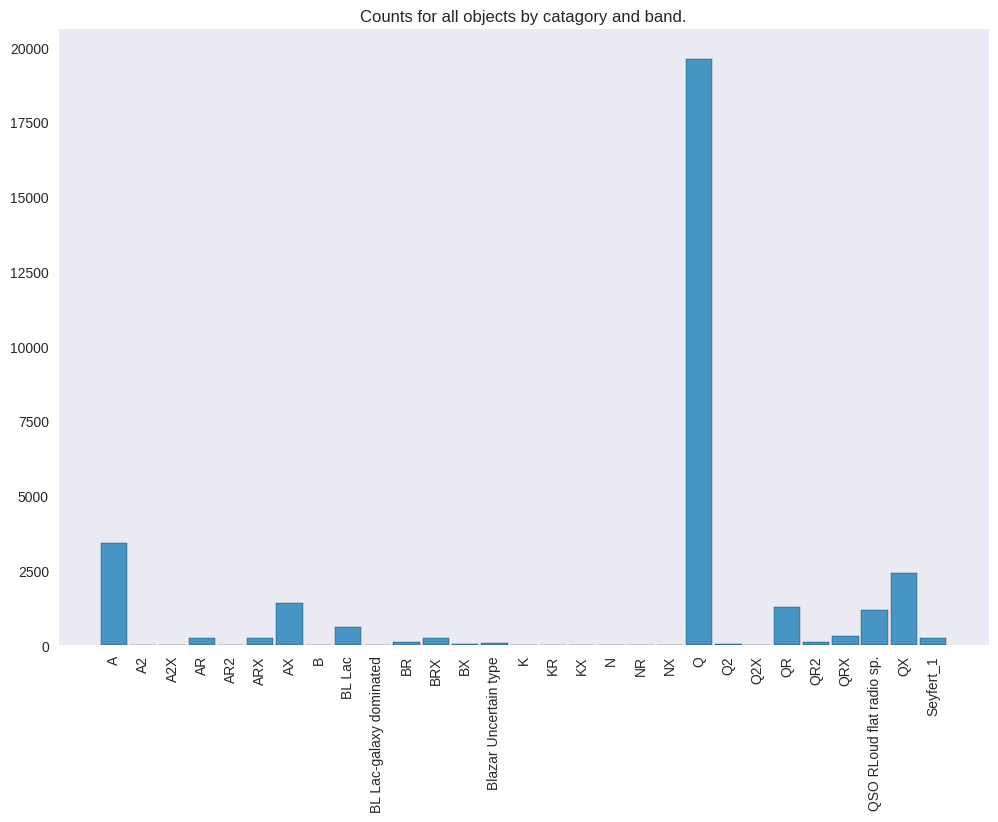

In [ ]:
### plotting the distribution
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
type_array = dmdt_by_Name_Band['type'].to_numpy()

plt.figure(figsize=(12,8))

counts, bin_edges, _ = plt.hist(type_array, bins=len(set(type_array)), edgecolor='black', alpha=0.7, align='mid', rwidth=0.9)

categories = sorted(set(type_array))
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.xticks(bin_centers, labels=categories, rotation=90)
plt.title('Counts for all objects by catagory and band.')

plt.show()

del type_array, counts, bin_edges, dmdt_by_Name_Band

We'll only consider the Q, QR, and QX catagories, while watching out for that large diaparity!

In [ ]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']
dmdt_by_Name_Band = dmdt_by_Name_Band.drop(columns=['n_good_det', 'band', 'hist_p_scale'])
dmdt_by_Name_Band

,name,type,histogram
6565,1WGA J16290+3724A,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
6566,2MASX J15371580+5829336,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
6567,2QZ J095248.7+004930,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 7.221780891167762e-05, 0.0]..."
6568,2QZ J095543.3+010536,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0001321527686005022, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0002925687536571094, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0001321527686005022, 0.0002925687536571094, 0.0], [0.0, 0.0002925687536571094, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ..."
6569,2QZ J100058.3+000530,Q,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0],..."
...,...,...,...
31553,XBS J104509.3-012442,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006802721088435374, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0006802721088435374, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0013605442176870747, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0007855459544383347, 0.0], [0.0, 0.00039277297721916735, 0.0], [0.0, 0.0003927729772191673..."
31554,XLSS J022249.5-051452,QX,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 

### RPCA with FBPCA

In [ ]:
import sys
# sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
sys.path.insert(0, Thesis_Files + 'Thesis/dmdt_Analysis/')

!pip install fbpca &> /dev/null
from fbpca_implementation import *

In [ ]:
def get_FBPA_mean_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    r_max_background = np.array([L_r[i, :].mean() for i in range(len(L_r[:, 0]))])
    g_max_background = np.array([L_g[i, :].mean() for i in range(len(L_g[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background


def get_FBPA_max_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    g_max_background = np.array([L_g[i, :].max() for i in range(len(L_g[:, 0]))])
    r_max_background = np.array([L_r[i, :].max() for i in range(len(L_r[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background


def get_FBPA_median_backgrounds(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    g_max_background = np.array([np.median(L_g[i, :]) for i in range(len(L_g[:, 0]))])
    r_max_background = np.array([np.median(L_r[i, :]) for i in range(len(L_r[:, 0]))])

    r_max_background = r_max_background.reshape(histogram_list[0][:, :, 0].shape)
    g_max_background = g_max_background.reshape(histogram_list[0][:, :, 0].shape)

    background = np.zeros_like(histogram_list[0])
    background[:, :, 0] = r_max_background
    background[:, :, 1] = g_max_background
    return background

In [ ]:
Q_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_max_background = get_FBPA_max_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.3476491716073541
rank sv: 126
error:  0.0528867970280717
rank sv: 51
error:  0.005746810686388873
rank sv: 176
error:  0.0003252598662451166
rank sv: 167
error:  1.5967768830055065e-05
rank sv: 292
error:  7.390815415872625e-07
rank sv: 249
error:  2.0334353060967392e-08
rank sv: 1
error:  0.376434633411162
rank sv: 126
error:  0.06216511718995437
rank sv: 56
error:  0.0063542392842195344
rank sv: 181
error:  0.000332327812550341
rank sv: 174
error:  1.4379630257420039e-05
rank sv: 299
error:  5.236588829917923e-07
rank sv: 246
error:  1.4047125308435304e-08
rank sv: 1
error:  0.30106394760796157
rank sv: 65
error:  0.04056232181695067
rank sv: 34
error:  0.0037048337808281272
rank sv: 98
error:  0.0002214320939040881
rank sv: 162
error:  1.1243659812767576e-05
rank sv: 150
error:  4.7004104678459706e-07
rank sv: 214
error:  1.4037381132487247e-08
rank sv: 1
error:  0.3331642418878159
rank sv: 65
error:  0.04791715801846301
rank sv: 37
error:  0.004081760019284857


In [ ]:
def subtract_background(histogram, background):
    subtracted = histogram - background
    subtracted = (subtracted - subtracted[:, :, :-1].min()) / (subtracted[:, :, :-1].max() - subtracted[:, :, :-1].min())
    subtracted[:, :, 2] = np.zeros_like(subtracted[:, :, 2])
    return subtracted

dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_max_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_max_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_max_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_max_background))

### Running FastAI on it

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_max_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

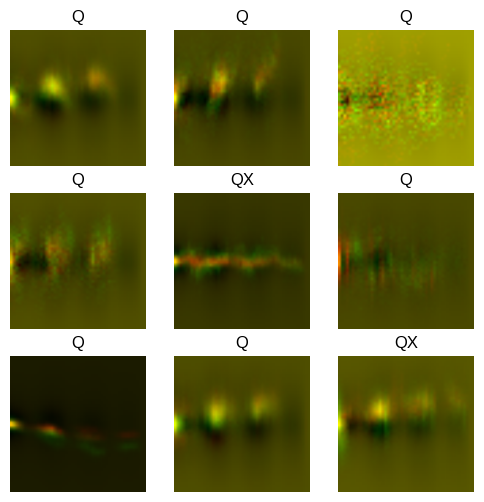

In [ ]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 248MB/s]


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0030199517495930195


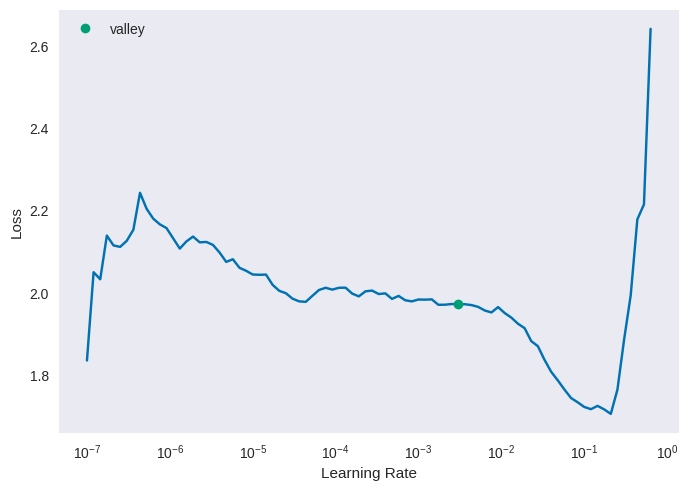

In [13]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [14]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='linear_bins_max_background_resnet34'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.525533,0.390534,0.866638,0.133362,01:11


Better model found at epoch 0 with valid_loss value: 0.3905337452888489.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.118327,0.100759,0.965154,0.034846,01:39
1,0.075747,0.068225,0.979135,0.020865,01:40
2,0.052653,0.030307,0.989890,0.010110,01:41
3,0.041017,0.059478,0.982792,0.017208,01:41
4,0.034738,0.037838,0.988169,0.011831,01:41
5,0.021517,0.033854,0.987309,0.012691,01:41


Better model found at epoch 0 with valid_loss value: 0.10075858980417252.
Better model found at epoch 1 with valid_loss value: 0.06822457164525986.
Better model found at epoch 2 with valid_loss value: 0.030307069420814514.
No improvement since epoch 2: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


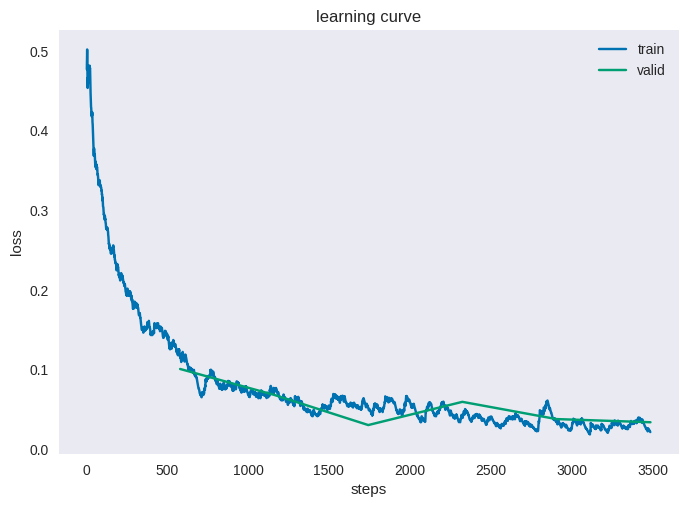

In [15]:
learn.recorder.plot_loss()
learn.load('linear_bins_max_background_resnet34')

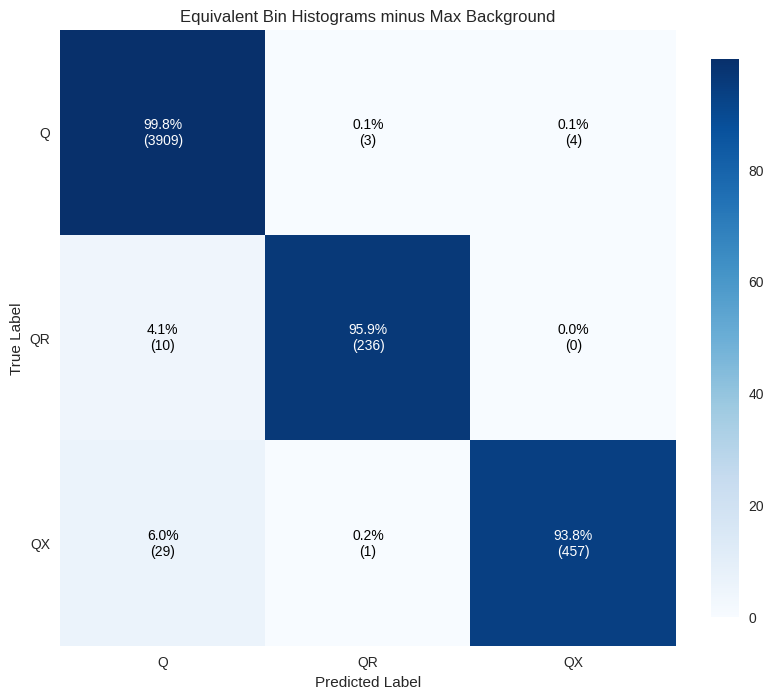

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

    # Add text annotations
    for i in range(len(cm_percent)):
        for j in range(len(cm_percent[i])):
            text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
            textcolour = color = "white" if cm_percent[i, j] > 50 else "black"
            ax.text(j, i, text, ha="center", va="center", color="black")

    ax.set_title('Linear Bins 50x50 mins Max Background')
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_xticks(range(len(interp.vocab)))
    ax.set_yticks(range(len(interp.vocab)))
    ax.set_xticklabels(interp.vocab)
    ax.set_yticklabels(interp.vocab)

In [17]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.99      1.00      0.99      3916
          QR       0.98      0.96      0.97       246
          QX       0.99      0.94      0.96       487

    accuracy                           0.99      4649
   macro avg       0.99      0.97      0.98      4649
weighted avg       0.99      0.99      0.99      4649



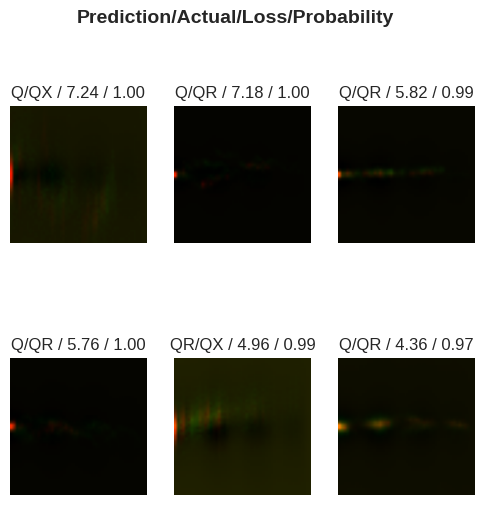

In [18]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

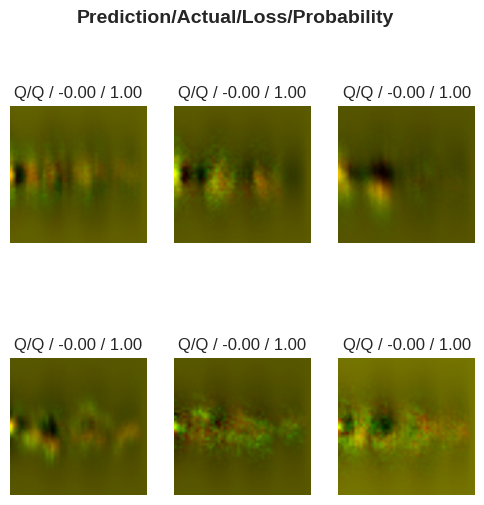

In [19]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

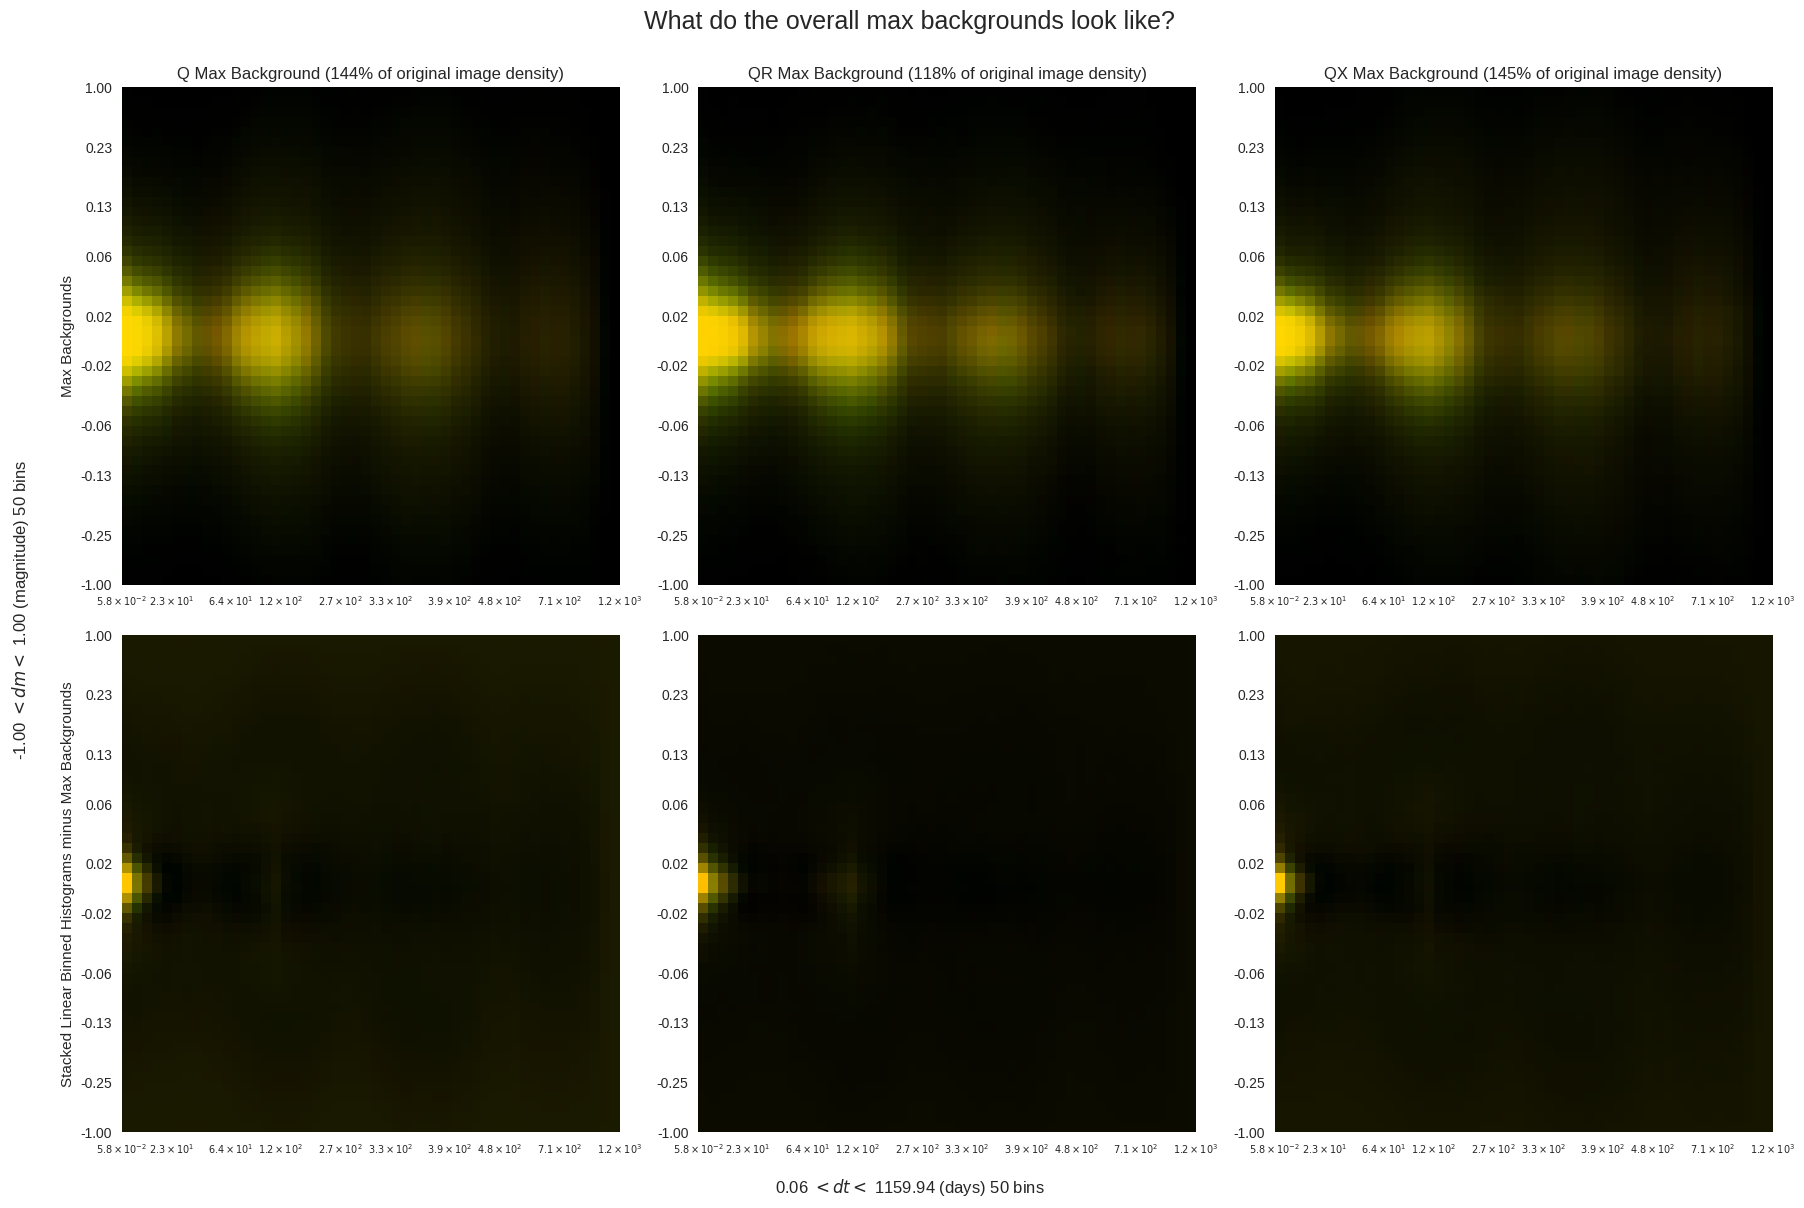

In [21]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

max_backgrounds = [Q_max_background, QR_max_background, QX_max_background]
total_densities = [background.sum() / 2 for background in max_backgrounds]
background_titles = [f'Q Max Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Max Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Max Background ({total_densities[2]:.0%} of original image density)']

for ax, max_background, title in zip(axs[0, :], max_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(max_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Max Backgrounds')

histograms_max_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_max_background'].sum()),
                             norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_max_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_max_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Linear Binned Histograms minus Max Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall max backgrounds look like?', size=18, y=1)

plt.tight_layout()

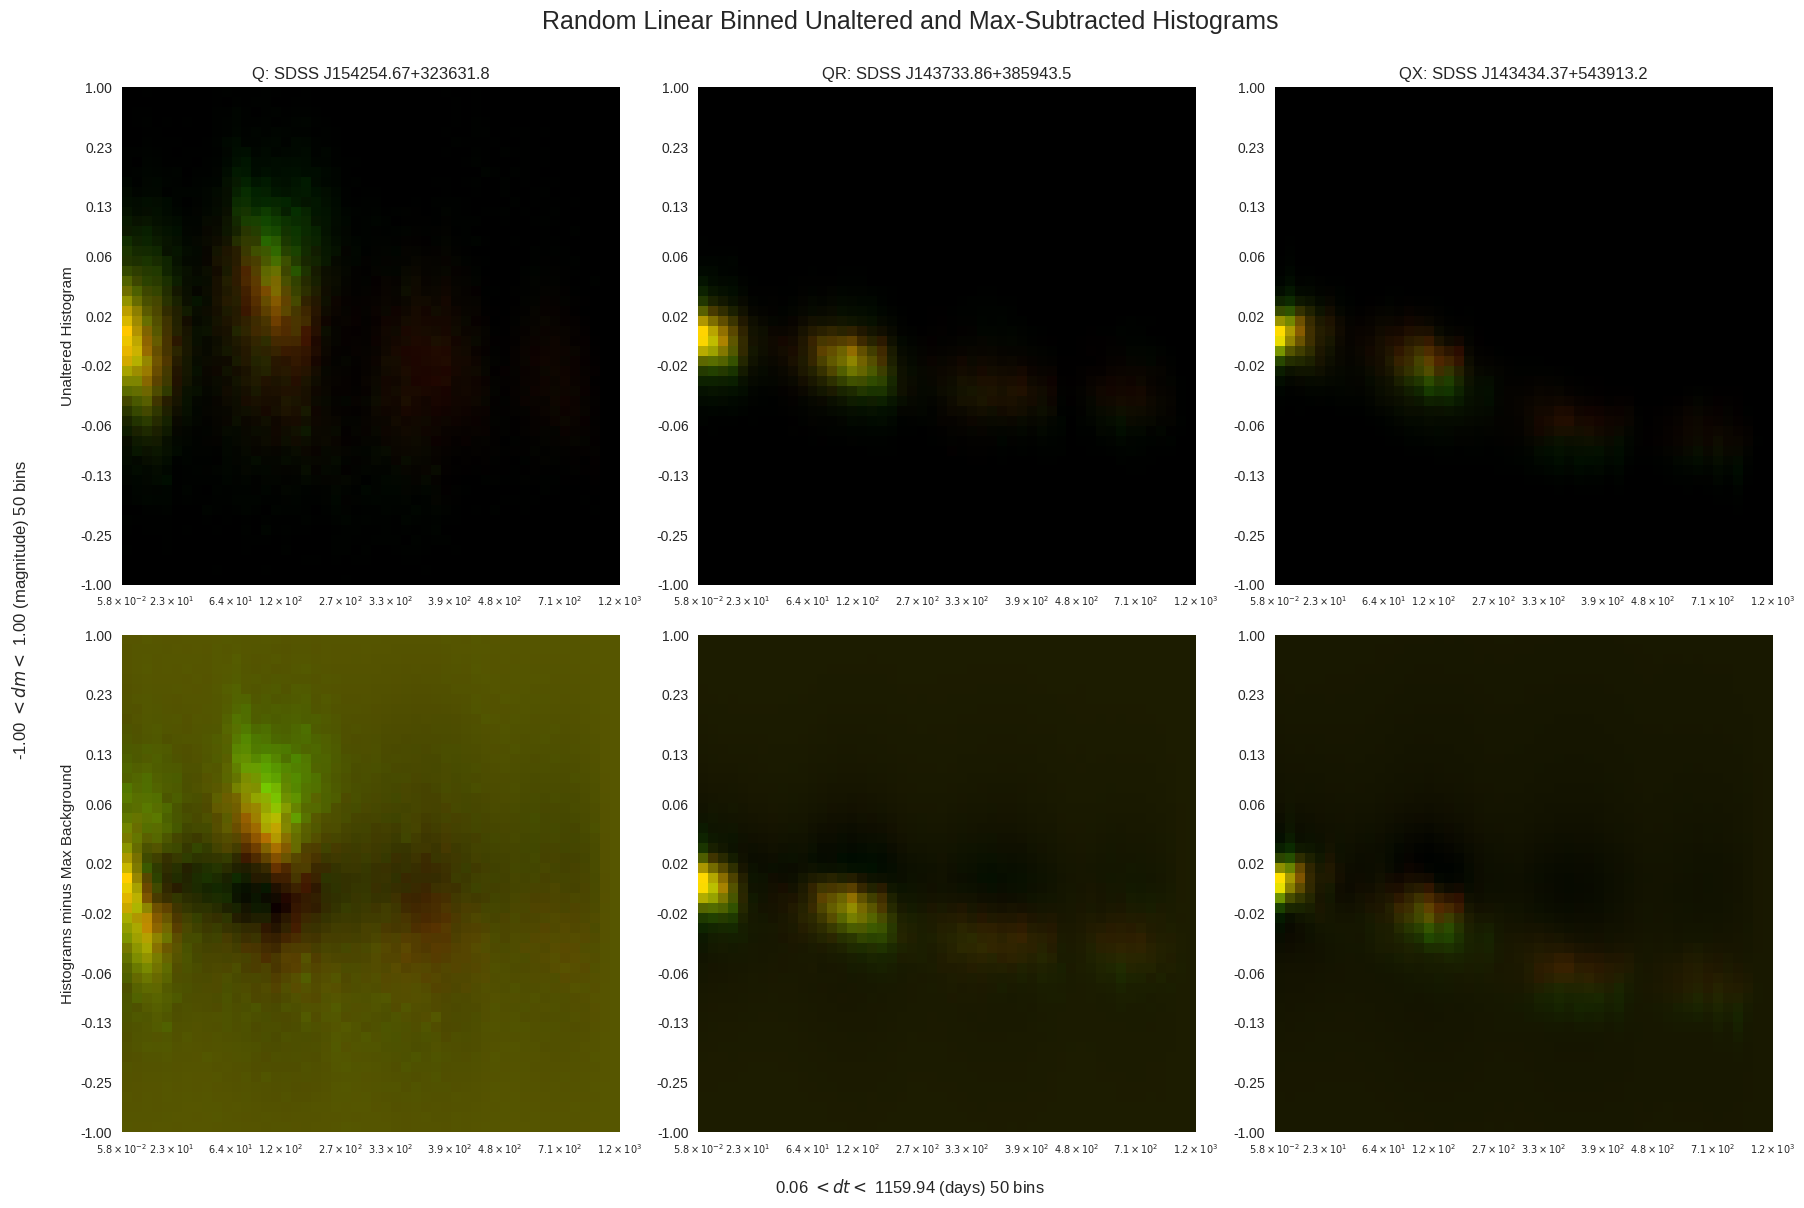

In [23]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
max_subtracted_histograms = [obj['histogram_minus_max_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], max_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Max Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Linear Binned Unaltered and Max-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# Trying this with mean background subtraction

In [24]:
Q_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_mean_background = get_FBPA_mean_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.3476491059291421
rank sv: 126
error:  0.052886744709059616
rank sv: 51
error:  0.00576911096101804
rank sv: 176
error:  0.0003268570725497969
rank sv: 168
error:  1.581754874362224e-05
rank sv: 293
error:  7.291085587314756e-07
rank sv: 251
error:  2.007928539980305e-08
rank sv: 1
error:  0.3764344970888634
rank sv: 126
error:  0.062165002675543715
rank sv: 55
error:  0.006390645181531842
rank sv: 180
error:  0.0003347449609751326
rank sv: 172
error:  1.4374716452210162e-05
rank sv: 297
error:  5.235026153371963e-07
rank sv: 244
error:  1.4327335218520224e-08
rank sv: 1
error:  0.3010639002005137
rank sv: 65
error:  0.040560378392219876
rank sv: 34
error:  0.0037068895793911285
rank sv: 98
error:  0.00022134431729704156
rank sv: 162
error:  1.1218534861472674e-05
rank sv: 150
error:  4.6776056230819683e-07
rank sv: 214
error:  1.3970725916215963e-08
rank sv: 1
error:  0.3331642040223656
rank sv: 65
error:  0.04792009862144947
rank sv: 37
error:  0.00407706758967021

In [25]:
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_mean_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_mean_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_mean_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_mean_background))

In [26]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_mean_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

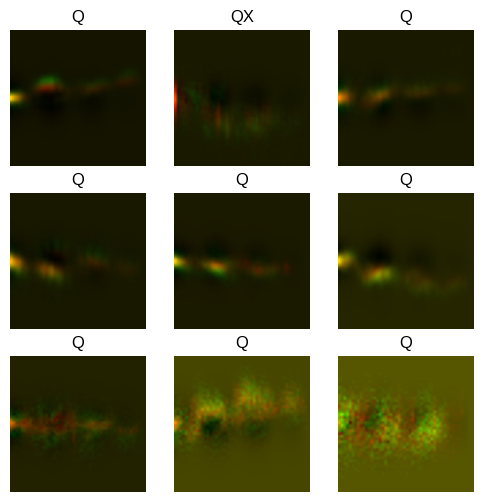

In [27]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0030199517495930195


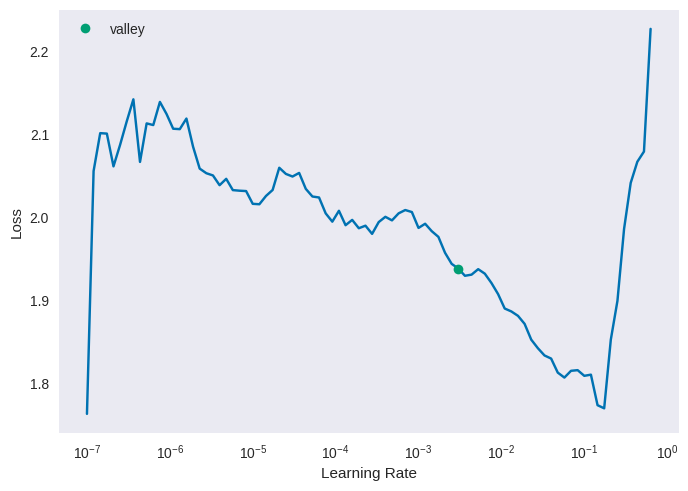

In [28]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [29]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='linear_bins_mean_background_resnet34'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.564942,0.473778,0.854162,0.145838,01:11


Better model found at epoch 0 with valid_loss value: 0.4737775921821594.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.307007,0.250687,0.913100,0.086900,01:40
1,0.223310,0.228249,0.920413,0.079587,01:40
2,0.186076,0.140564,0.946655,0.053345,01:41
3,0.148872,0.185661,0.925145,0.074855,01:41
4,0.087634,0.186546,0.944289,0.055711,01:41
5,0.065535,0.122965,0.953753,0.046247,01:41
6,0.063188,0.103760,0.966875,0.033125,01:41
7,0.038293,0.082186,0.974618,0.025382,01:42
8,0.057509,0.111922,0.967090,0.032910,01:41
9,0.019157,0.088259,0.972682,0.027318,01:41


Better model found at epoch 0 with valid_loss value: 0.2506868541240692.
Better model found at epoch 1 with valid_loss value: 0.2282494306564331.
Better model found at epoch 2 with valid_loss value: 0.14056405425071716.
Better model found at epoch 5 with valid_loss value: 0.12296508252620697.
Better model found at epoch 6 with valid_loss value: 0.1037597805261612.
Better model found at epoch 7 with valid_loss value: 0.08218646049499512.
No improvement since epoch 7: early stopping


/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


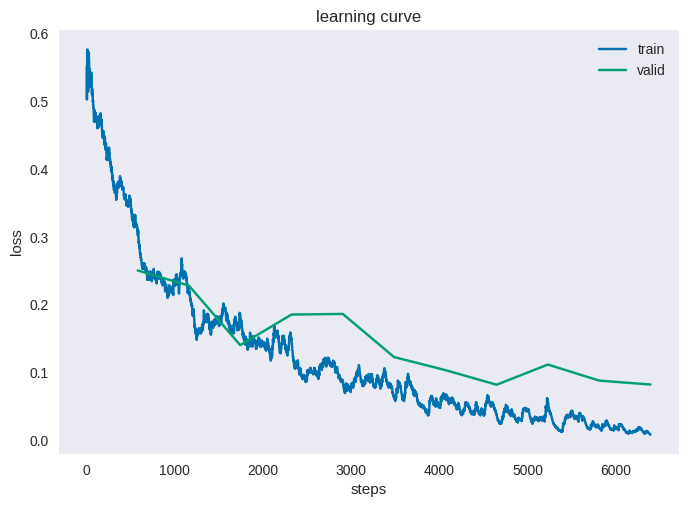

In [30]:
learn.recorder.plot_loss()
learn.load('linear_bins_mean_background_resnet34')

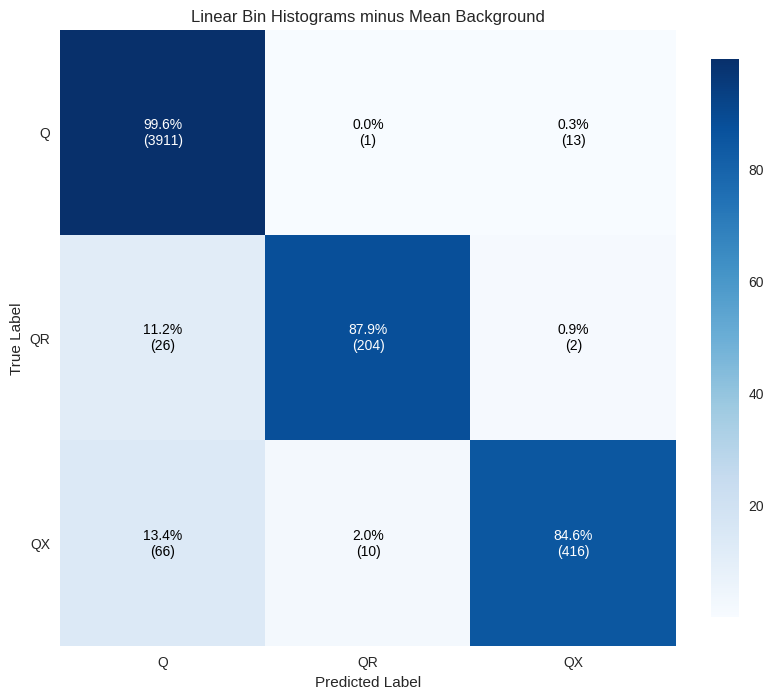

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(9, 8))
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        color = "white" if cm_percent[i, j] > 50 else "black"
        ax.text(j, i, text, ha="center", va="center", color=color)

ax.set_title("Linear Bin Histograms minus Mean Background")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)
# plt.colorbar(im, fraction=0.04)
plt.show()

In [32]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.98      1.00      0.99      3925
          QR       0.95      0.88      0.91       232
          QX       0.97      0.85      0.90       492

    accuracy                           0.97      4649
   macro avg       0.96      0.91      0.93      4649
weighted avg       0.97      0.97      0.97      4649



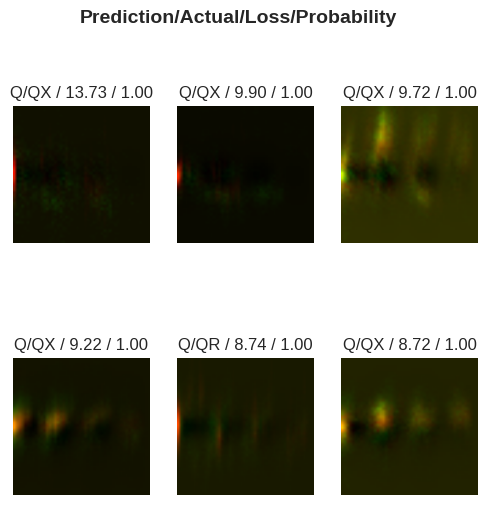

In [33]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

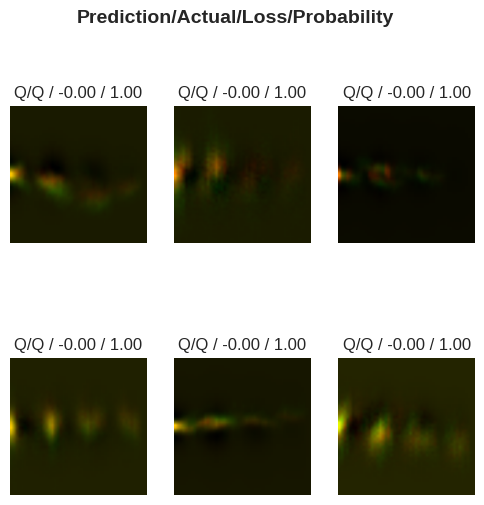

In [34]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

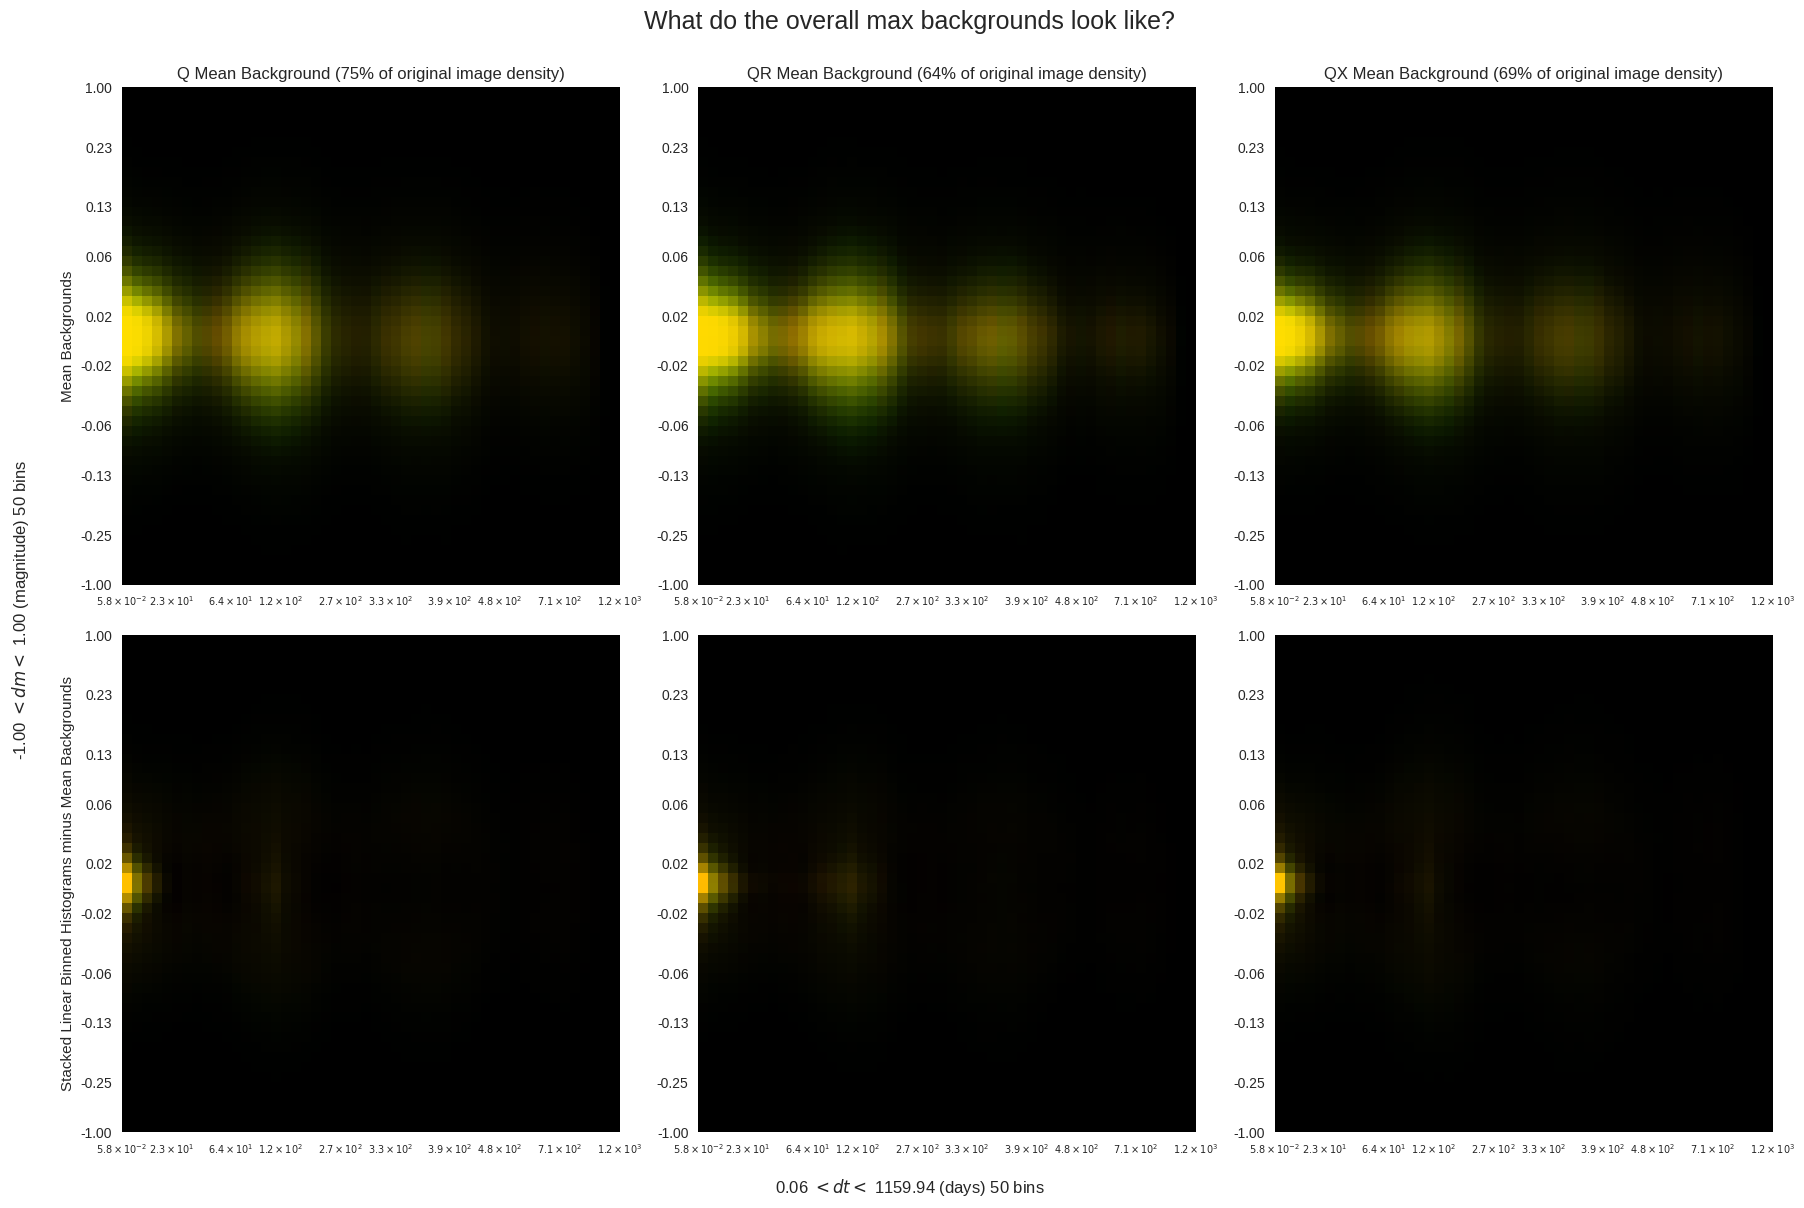

In [36]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

mean_backgrounds = [Q_mean_background, QR_mean_background, QX_mean_background]
total_densities = [background.sum() / 2 for background in mean_backgrounds]
background_titles = [f'Q Mean Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Mean Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Mean Background ({total_densities[2]:.0%} of original image density)']

for ax, mean_background, title in zip(axs[0, :], mean_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(mean_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Mean Backgrounds')

histograms_mean_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_mean_background'].sum()),
                              norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_mean_background'].sum()),
                              norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_mean_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_mean_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Linear Binned Histograms minus Mean Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall max backgrounds look like?', size=18, y=1)

plt.tight_layout()

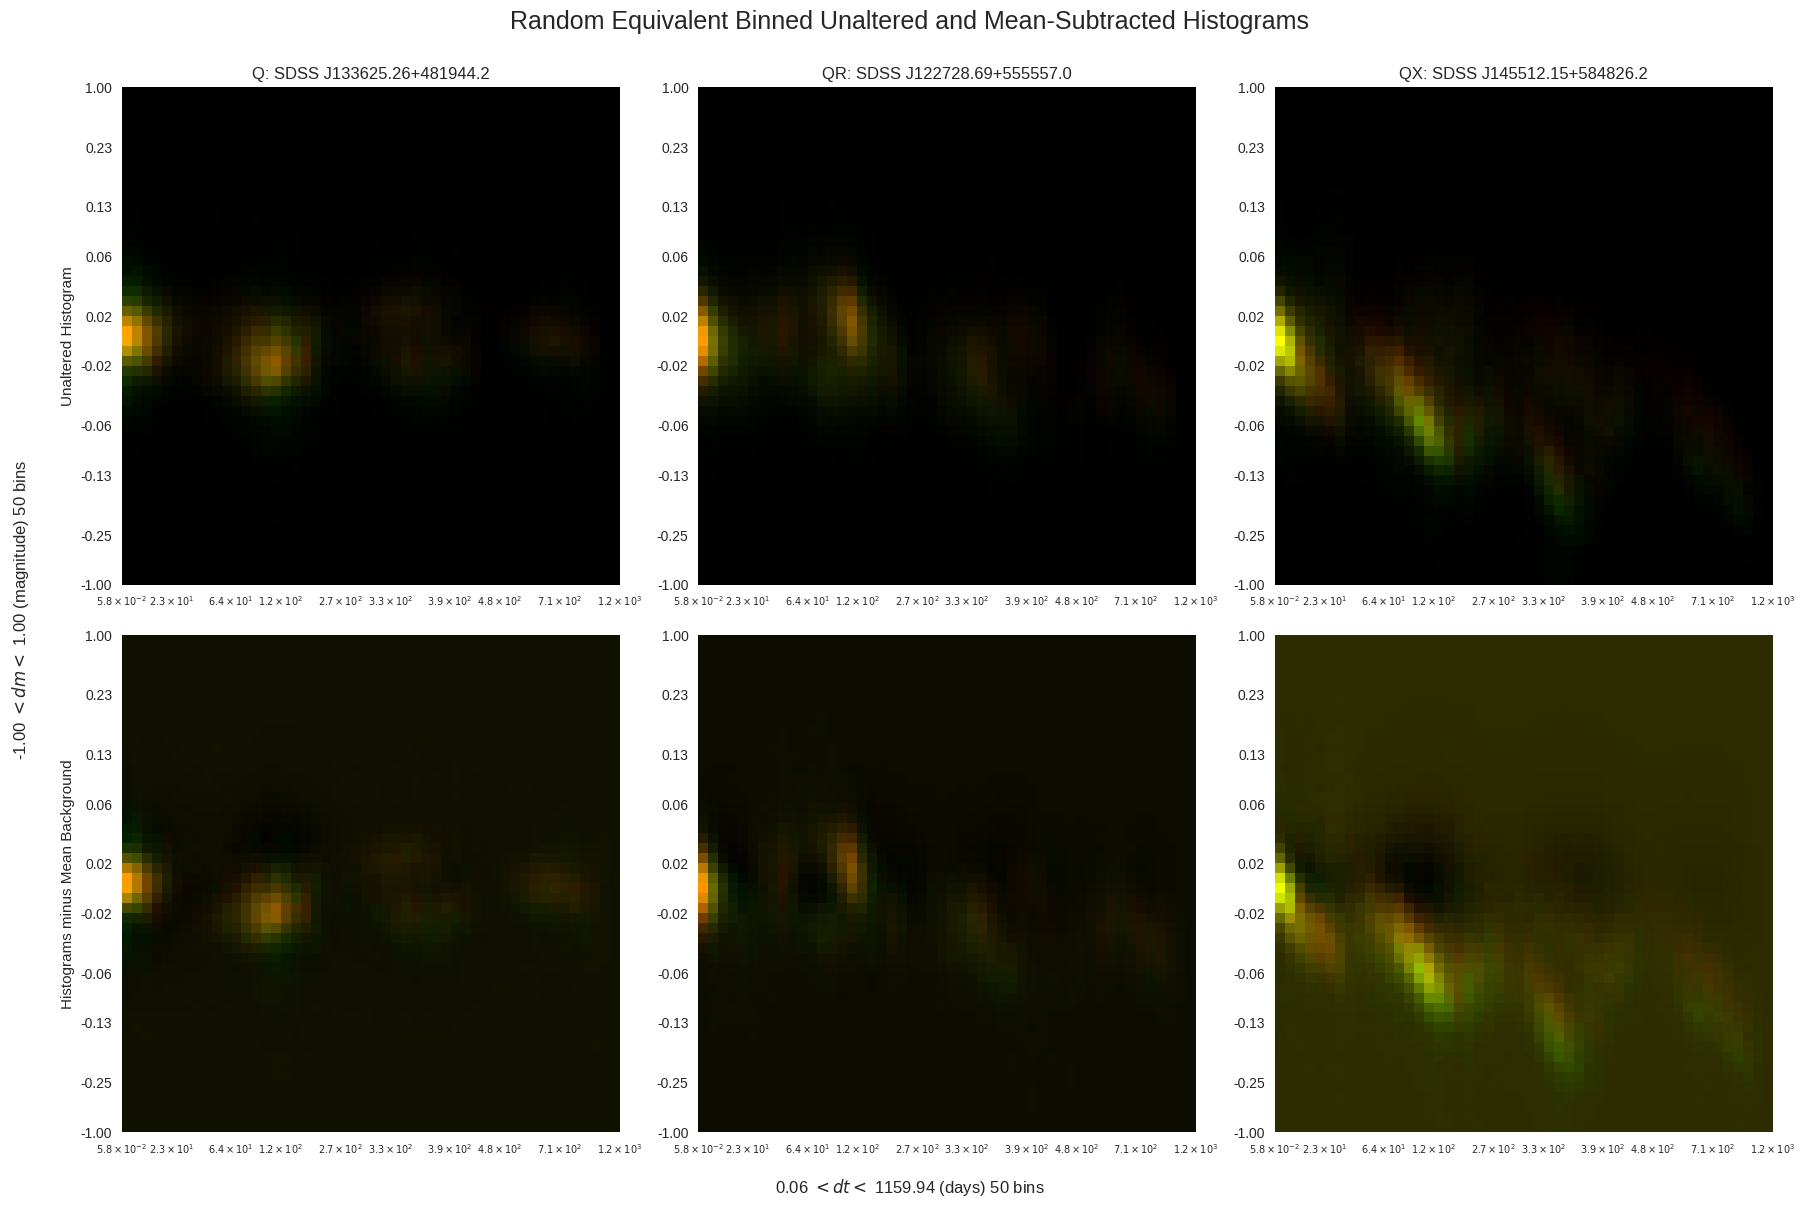

In [37]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
mean_subtracted_histograms = [obj['histogram_minus_mean_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], mean_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Mean Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Equivalent Binned Unaltered and Mean-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# Trying this with mean background subtraction

In [38]:
Q_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram'].to_numpy())
QR_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram'].to_numpy())
QX_median_background = get_FBPA_median_backgrounds(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram'].to_numpy())

rank sv: 1
error:  0.34764914998318575
rank sv: 126
error:  0.05288697733132187
rank sv: 51
error:  0.005765990303588149
rank sv: 176
error:  0.0003260872550205755
rank sv: 168
error:  1.5789360856192855e-05
rank sv: 293
error:  7.219767779315963e-07
rank sv: 249
error:  1.988312488273345e-08
rank sv: 1
error:  0.3764345103061142
rank sv: 126
error:  0.06216509842157294
rank sv: 56
error:  0.006353943837612479
rank sv: 181
error:  0.0003321544607157564
rank sv: 174
error:  1.4379343143957146e-05
rank sv: 299
error:  5.22980698855493e-07
rank sv: 245
error:  1.4150941497261394e-08
rank sv: 1
error:  0.3010639464338336
rank sv: 65
error:  0.04056286548951258
rank sv: 34
error:  0.0037120681719498864
rank sv: 98
error:  0.00022229138681355715
rank sv: 162
error:  1.1185375588951083e-05
rank sv: 151
error:  4.573599383182892e-07
rank sv: 215
error:  1.3849835354666855e-08
rank sv: 1
error:  0.33316420027686505
rank sv: 65
error:  0.04791931365159413
rank sv: 37
error:  0.004074944632784738

In [39]:
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'Q', 'histogram'].apply(lambda x: subtract_background(x, Q_median_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QR', 'histogram'].apply(lambda x: subtract_background(x, QR_median_background))
dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram_minus_median_background'] = dmdt_by_Name_Band.loc[dmdt_by_Name_Band['type'] == 'QX', 'histogram'].apply(lambda x: subtract_background(x, QX_median_background))

In [40]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),   # Input: images, Output: categories
    get_x=lambda r: numpy_to_pil(r['histogram_minus_median_background']),  # Convert NumPy array to image
    get_y=lambda r: r['type'],           # Get the label (type)
    splitter=RandomSplitter(valid_pct=0.2),  # Split into training and validation sets
    item_tfms=Resize(224)
)

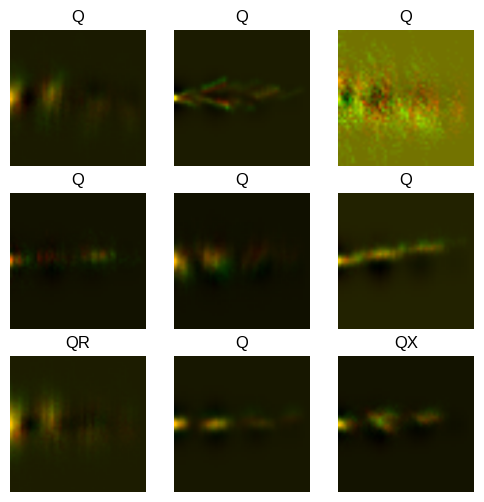

In [41]:
dls = dblock.dataloaders(dmdt_by_Name_Band, bs=32)  # Batch size of 32
dls.show_batch(max_n=9, figsize=(6, 6))

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

Suggested Learning Rates: Min: 0.0030199517495930195


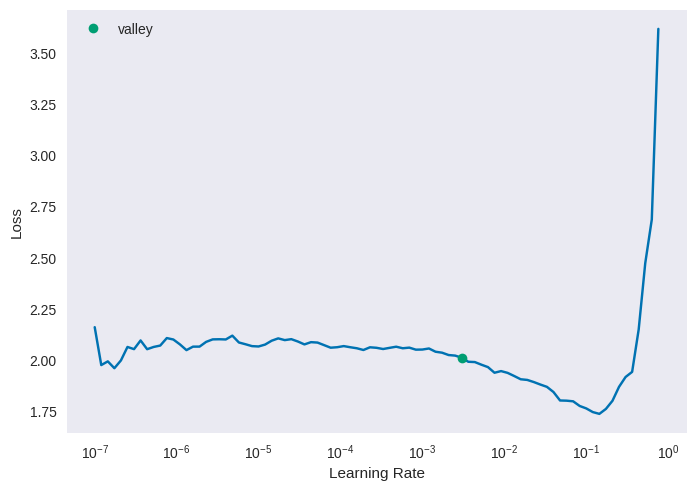

In [42]:
learn = vision_learner(dls, resnet34, metrics=[accuracy, error_rate])

lr_min = learn.lr_find(show_plot=True)
print(f"Suggested Learning Rates: Min: {lr_min.valley}")

In [43]:
learn.fine_tune(20, base_lr=lr_min.valley, cbs=[SaveModelCallback(monitor='valid_loss', comp=np.less, fname='linear_bins_median_background_resnet34'), EarlyStoppingCallback(monitor='valid_loss', patience=3)])

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.573396,0.494625,0.849430,0.150570,01:12


Better model found at epoch 0 with valid_loss value: 0.4946252405643463.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.282366,0.251834,0.920198,0.079802,01:40
1,0.206597,0.233474,0.909443,0.090557,01:41
2,0.133045,0.206751,0.935040,0.064960,01:41
3,0.129875,0.186133,0.934394,0.065606,01:41
4,0.107324,0.200758,0.927296,0.072704,01:41
5,0.076705,0.149037,0.962573,0.037427,01:41
6,0.069110,0.146171,0.950312,0.049688,01:42
7,0.042994,0.091277,0.968165,0.031835,01:42
8,0.025831,0.081573,0.974618,0.025382,01:42
9,0.015667,0.078144,0.977630,0.022370,01:41


Better model found at epoch 0 with valid_loss value: 0.2518339455127716.
Better model found at epoch 1 with valid_loss value: 0.23347420990467072.
Better model found at epoch 2 with valid_loss value: 0.2067512720823288.
Better model found at epoch 3 with valid_loss value: 0.18613256514072418.
Better model found at epoch 5 with valid_loss value: 0.14903704822063446.
Better model found at epoch 6 with valid_loss value: 0.14617055654525757.
Better model found at epoch 7 with valid_loss value: 0.09127730876207352.
Better model found at epoch 8 with valid_loss value: 0.08157309144735336.
Better model found at epoch 9 with valid_loss value: 0.07814411073923111.
Better model found at epoch 10 with valid_loss value: 0.054447636008262634.
Better model found at epoch 13 with valid_loss value: 0.04831128567457199.
Better model found at epoch 15 with valid_loss value: 0.04822235181927681.
Better model found at epoch 16 with valid_loss value: 0.04069710895419121.
Better model found at epoch 18 with

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


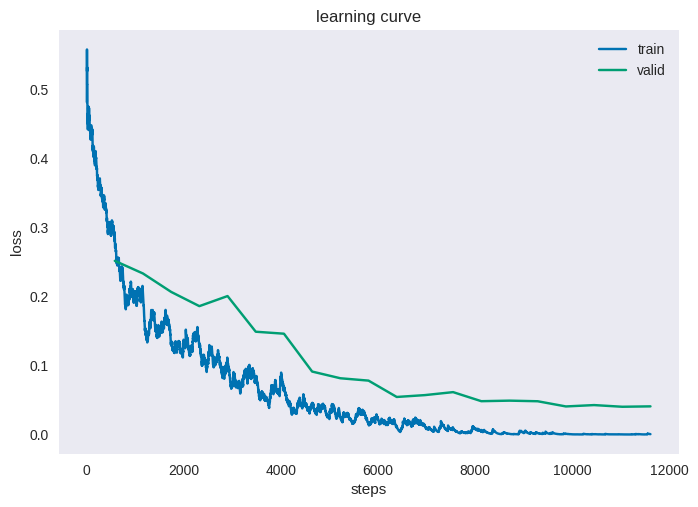

In [44]:
learn.recorder.plot_loss()
learn.load('linear_bins_median_background_resnet34')

In [45]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
im = ax.imshow(cm_percent, cmap='Blues', interpolation='nearest')

# Add text annotations
for i in range(len(cm_percent)):
    for j in range(len(cm_percent[i])):
        text = f"{cm_percent[i, j]:.1f}%\n({int(cm[i, j])})"
        textcolour = color = "white" if cm_percent[i, j] > 50 else "black"
        ax.text(j, i, text, ha="center", va="center", color="black")

ax.set_title('Linear Bins Histograms minus Median Background')
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_xticks(range(len(interp.vocab)))
ax.set_yticks(range(len(interp.vocab)))
ax.set_xticklabels(interp.vocab)
ax.set_yticklabels(interp.vocab)

[Text(0, 0, 'Q'), Text(0, 1, 'QR'), Text(0, 2, 'QX')]

In [46]:
preds, targets = learn.get_preds()
pred_classes = preds.argmax(dim=1)

# Generate the report
report = classification_report(targets, pred_classes, target_names=dls.vocab)
print(report)

              precision    recall  f1-score   support

           Q       0.99      1.00      1.00      3874
          QR       0.97      0.94      0.96       286
          QX       0.98      0.94      0.96       489

    accuracy                           0.99      4649
   macro avg       0.98      0.96      0.97      4649
weighted avg       0.99      0.99      0.99      4649



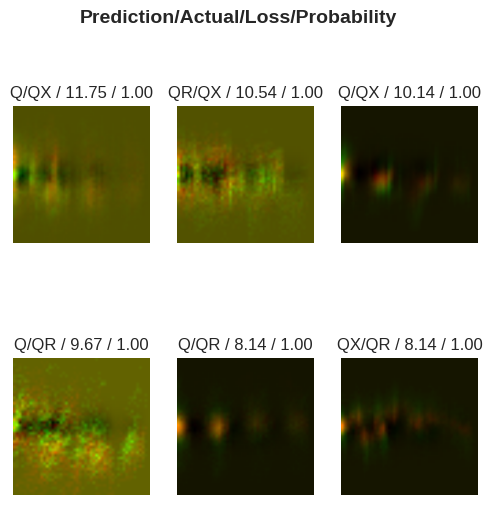

In [47]:
interp.plot_top_losses(k=6, figsize=(6, 6))  # Show 5 samples with largest loss

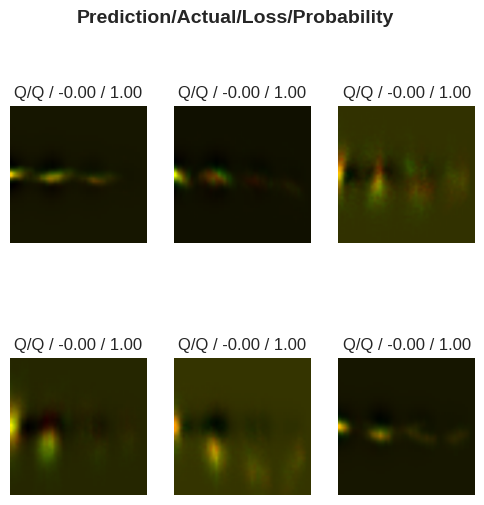

In [48]:
interp.plot_top_losses(k=6, figsize=(6, 6), largest=False)  # Show 5 samples with lowest loss

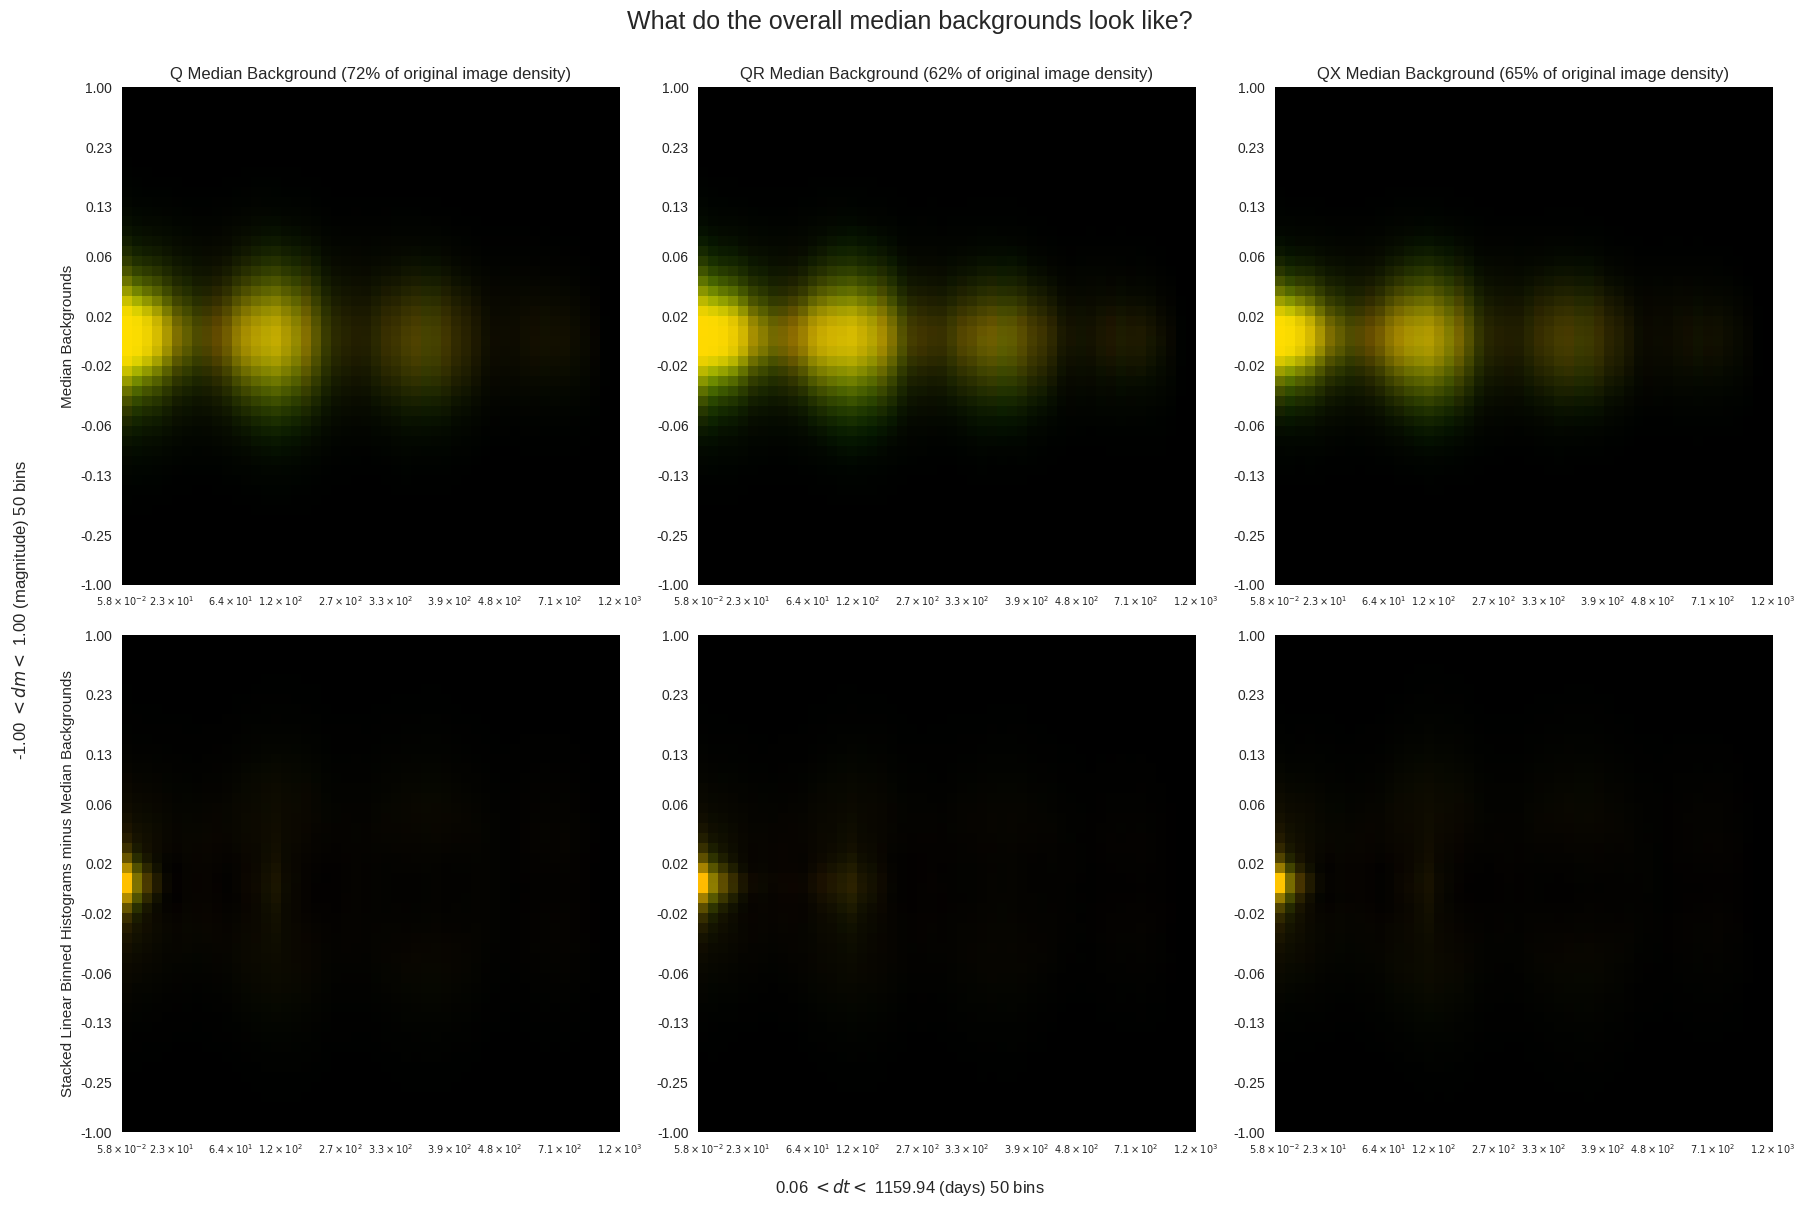

In [49]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

median_backgrounds = [Q_median_background, QR_median_background, QX_median_background]
total_densities = [background.sum() / 2 for background in median_backgrounds]
background_titles = [f'Q Median Background ({total_densities[0]:.0%} of original image density)',
                     f'QR Median Background ({total_densities[1]:.0%} of original image density)',
                     f'QX Median Background ({total_densities[2]:.0%} of original image density)']

for ax, median_background, title in zip(axs[0, :], median_backgrounds, background_titles):
    ax.imshow(numpy_to_pil(median_background), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Median Backgrounds')

histograms_median_subtracted = [norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q']['histogram_minus_median_background'].sum()),
                                norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR']['histogram_minus_median_background'].sum()),
                                norm(dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX']['histogram_minus_median_background'].sum())]

for ax, hist in zip(axs[1, :], histograms_median_subtracted):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Stacked Linear Binned Histograms minus Median Backgrounds')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('What do the overall median backgrounds look like?', size=18, y=1)

plt.tight_layout()

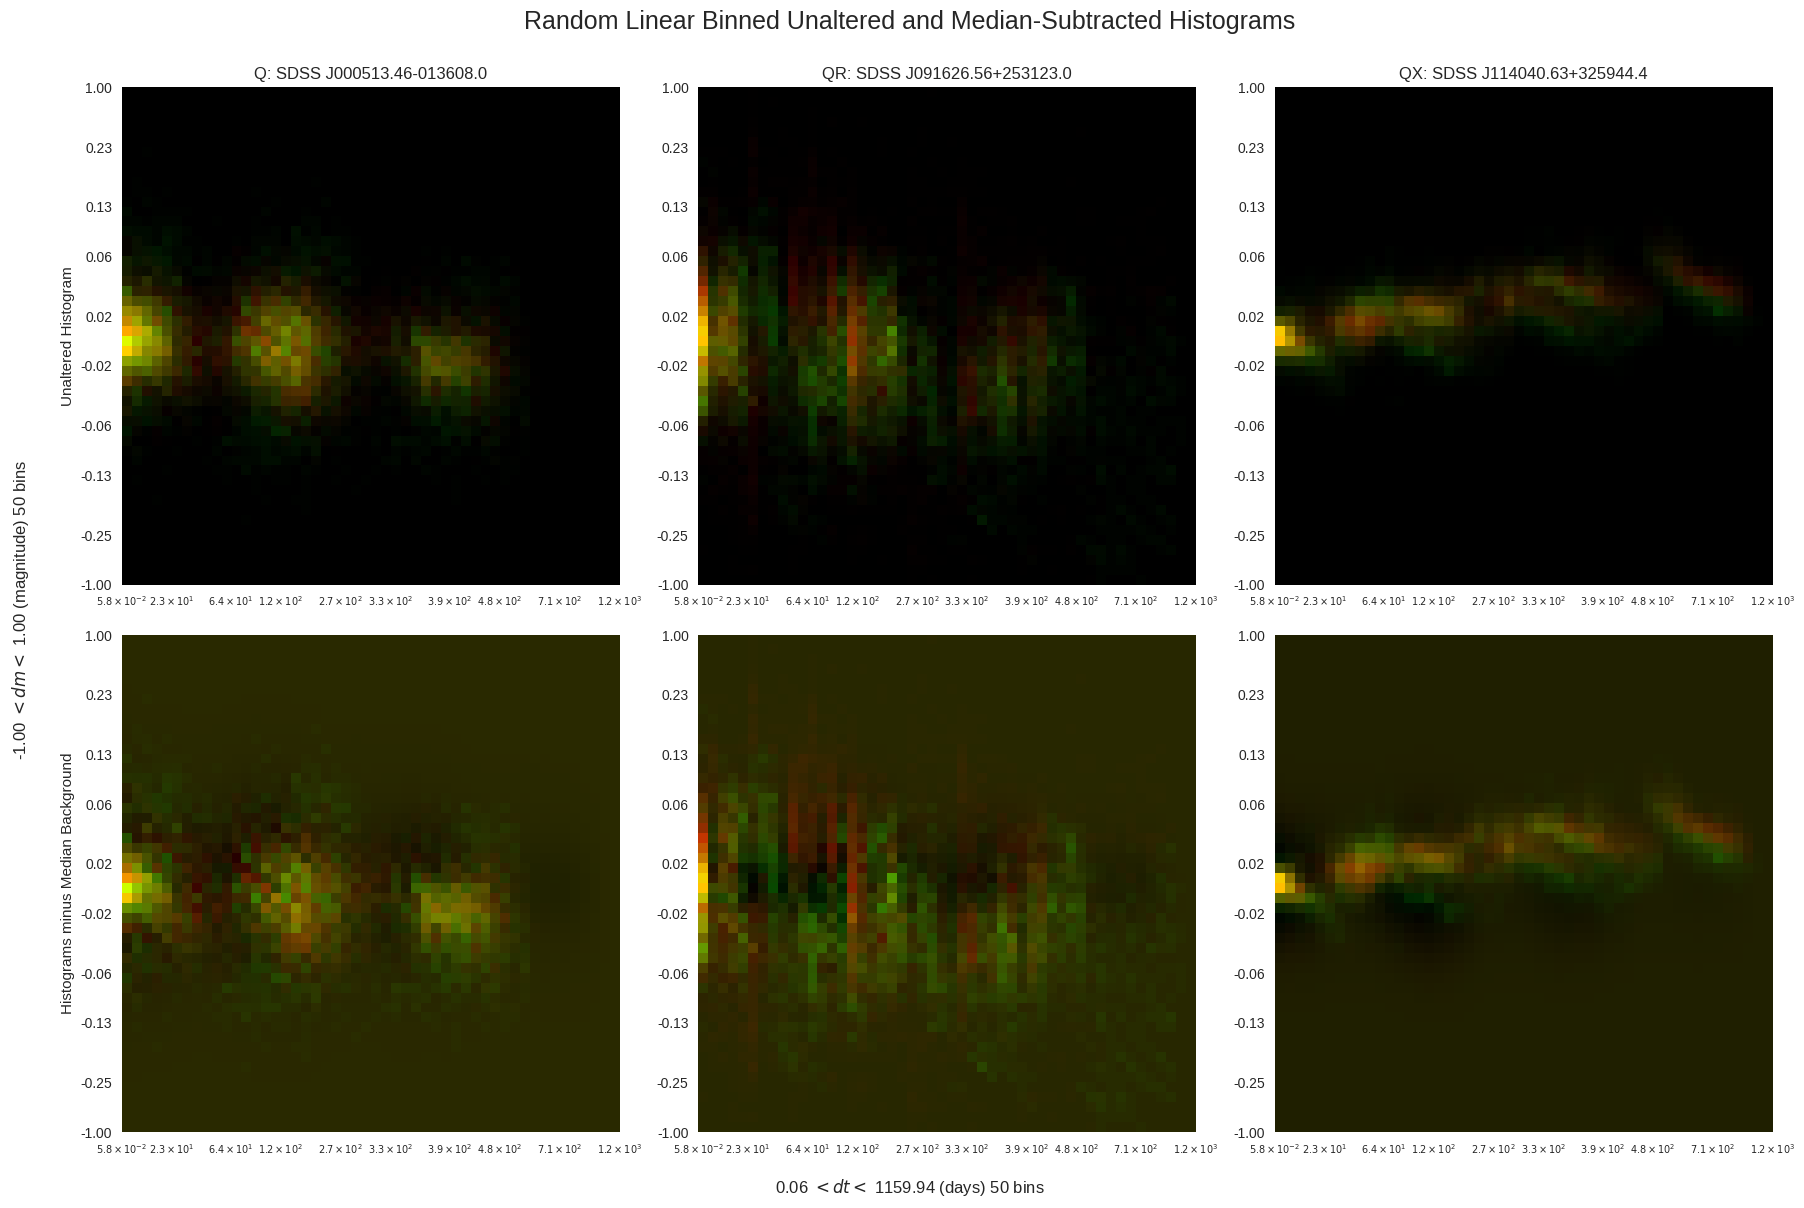

In [50]:
dm_nticks, dt_nticks = 10, 10

dm_indices = np.linspace(0, len(dm_bins) - 1, dm_nticks, dtype=int)
dt_indices = np.linspace(0, len(dt_bins) - 1, dt_nticks, dtype=int)

dm_ticks_labels = []
for index in dm_indices:
    formatted_string = f"{dm_bins[index]:.2f}"
    dm_ticks_labels.append(formatted_string)

dt_ticks_labels = []
for index in dt_indices:
    formatted_string = f"{dt_bins[index]:.1e}"
    base, exponent = formatted_string.split('e')
    dt_ticks_labels.append(f"${base} \\times 10^{{{int(exponent)}}}$")


random_objects = [dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].sample(1),
                  dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].sample(1)]
histograms = [obj['histogram'].iloc[0] for obj in random_objects]
median_subtracted_histograms = [obj['histogram_minus_median_background'].iloc[0] for obj in random_objects]

titles = [f"Q: {random_objects[0]['name'].iloc[0]}", f"QR: {random_objects[1]['name'].iloc[0]}", f"QX: {random_objects[2]['name'].iloc[0]}"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


for ax, hist, title in zip(axs[0, :], histograms, titles):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
    ax.set_title(title)
axs[0, 0].set_ylabel('Unaltered Histogram')

for ax, hist in zip(axs[1, :], median_subtracted_histograms):
    ax.imshow(numpy_to_pil(hist), extent=[0, len(dt_bins)-1, 0, len(dm_bins) - 1])
    ax.set_yticks(ticks=dm_indices, labels=dm_ticks_labels)
    ax.set_xticks(ticks=dt_indices, labels=dt_ticks_labels, size=7)
axs[1, 0].set_ylabel('Histograms minus Median Background')

fig.supxlabel(f'{dt_bins.min():.2f} $< dt <$ {dt_bins.max():.2f} (days) {len(dt_bins) - 1} bins', size=12)
fig.supylabel(f'{dm_bins.min():.2f} $< dm <$ {dm_bins.max():.2f} (magnitude) {len(dm_bins) - 1} bins', size=12, x=0.0001)
fig.suptitle('Random Linear Binned Unaltered and Median-Subtracted Histograms', size=18, y=1)

plt.tight_layout()

# What are the distributions in background contribution?

In [51]:
dmdt_by_Name_Band = pd.read_pickle(dmdt_by_Name_Band_file)
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['type'].isin(['Q', 'QR', 'QX'])]
dmdt_by_Name_Band = dmdt_by_Name_Band[dmdt_by_Name_Band['band'] == 'rg']

In [52]:
def get_FBPA_LS_histograms(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    L_array = []
    S_array = []
    for i in range(len(M_r[0, :])):
        L_histogram = np.zeros_like(histogram_list[0])
        S_histogram = np.zeros_like(histogram_list[0])

        L_r_histogram, L_g_histogram = L_r[:, i].reshape(histogram_list[0][:, :, 0].shape), L_g[:, i].reshape(histogram_list[0][:, :, 0].shape)
        S_r_histogram, S_g_histogram = S_r[:, i].reshape(histogram_list[0][:, :, 0].shape), S_g[:, i].reshape(histogram_list[0][:, :, 0].shape)

        L_histogram[:, :, 0] = L_r_histogram
        L_histogram[:, :, 1] = L_g_histogram
        S_histogram[:, :, 0] = S_r_histogram
        S_histogram[:, :, 1] = S_g_histogram

        L_array.append(L_histogram)
        S_array.append(S_histogram)

    return L_array, S_array

In [53]:
dmdt_by_Name_Band_Q = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'Q'].copy()
dmdt_by_Name_Band_QR = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QR'].copy()
dmdt_by_Name_Band_QX = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == 'QX'].copy()

del dmdt_by_Name_Band

In [54]:
for df in [dmdt_by_Name_Band_Q, dmdt_by_Name_Band_QR, dmdt_by_Name_Band_QX]:
    L_array, S_array = get_FBPA_LS_histograms(df['histogram'].to_numpy())
    df['L'] = L_array
    df['S'] = S_array

rank sv: 1
error:  0.34764957488949394
rank sv: 126
error:  0.0528874030769785
rank sv: 51
error:  0.005756467329446914
rank sv: 176
error:  0.0003258916230442883
rank sv: 168
error:  1.593203060427405e-05
rank sv: 293
error:  7.375773450470746e-07
rank sv: 251
error:  2.0251543399919275e-08
rank sv: 1
error:  0.3764345209728523
rank sv: 126
error:  0.06216466040787582
rank sv: 55
error:  0.006381664709549321
rank sv: 180
error:  0.0003344167624114957
rank sv: 173
error:  1.4329104274640183e-05
rank sv: 298
error:  5.222210138366175e-07
rank sv: 245
error:  1.4271781504528404e-08
rank sv: 1
error:  0.30106385378313383
rank sv: 65
error:  0.04056112506392285
rank sv: 34
error:  0.0037047476834943965
rank sv: 98
error:  0.00022082588173460952
rank sv: 162
error:  1.1298175421532454e-05
rank sv: 151
error:  4.799317063473597e-07
rank sv: 215
error:  1.441318989497679e-08
rank sv: 1
error:  0.33316418985030366
rank sv: 65
error:  0.04791170323094516
rank sv: 37
error:  0.004076614485748697

In [55]:
dmdt_by_Name_Band = pd.concat([dmdt_by_Name_Band_Q, dmdt_by_Name_Band_QR, dmdt_by_Name_Band_QX], axis=0, ignore_index=True)

In [56]:
dmdt_by_Name_Band.to_pickle(dmdt_by_Name_Band_file.split('.')[0] + '_ClassLS.pkl')

In [57]:
def get_FBPA_MLS(histogram_list):
    r_histograms = np.array([arr[:, :, 0] for arr in histogram_list])
    g_histograms = np.array([arr[:, :, 1] for arr in histogram_list])

    M_r = np.stack([arr.flatten() for arr in r_histograms], axis=1)
    M_g = np.stack([arr.flatten() for arr in g_histograms], axis=1)

    L_r, S_r, examples =  pcp(M_r, maxiter=7, k=10, example_column=1000)
    L_g, S_g, examples =  pcp(M_g, maxiter=7, k=10, example_column=1000)

    return M_r, L_r, S_r, M_g, L_g, S_g

def get_background_contribution(M, L, S):
    L_ratio_list = np.array([L[:, i].sum() / M[:, i].sum() for i in range(len(L[0, :]))])
    S_ratio_list = np.array([S[:, i].sum() / M[:, i].sum() for i in range(len(L[0, :]))])
    return L_ratio_list, S_ratio_list

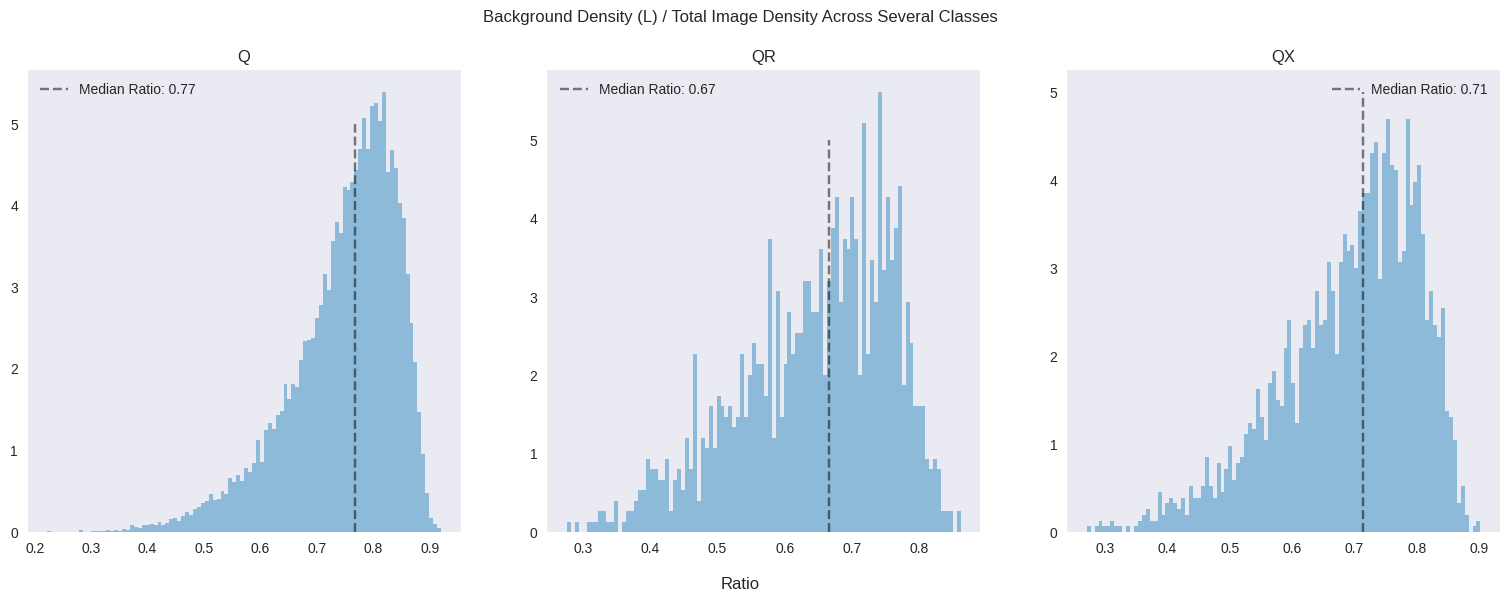

In [58]:
object_types = ['Q', 'QR', 'QX']
nbins = 100
alpha = 0.4

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(19, 6))

for ax, object_type in zip(axs, object_types):
    df = dmdt_by_Name_Band[dmdt_by_Name_Band['type'] == object_type]
    histogram_density_array = df['histogram'].apply(np.sum).to_numpy()
    L_density_array = df['L'].apply(np.sum).to_numpy()
    ratio_array = L_density_array / histogram_density_array

    median = np.median(ratio_array)
    ax.vlines(median, ymin=0, ymax=5, colors='black', linestyles='--', alpha=0.5, label=f'Median Ratio: {median:.2f}')

    ax.hist(ratio_array, bins=nbins, alpha=alpha, density=True)
    ax.set_title(object_type)
    # ax.set_xlim(0, 2)

fig.suptitle('Background Density (L) / Total Image Density Across Several Classes')
fig.supxlabel('Cont Density')
fig.supxlabel('Ratio')

for ax in axs:
    ax.legend()

plt.show()